In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

In [3]:
data=pd.read_csv('real_estate_price_size.csv')
data.head()

,price,size
0,234314.144,643.09
1,228581.528,656.22
2,281626.336,487.29
3,401255.608,1504.75
4,458674.256,1275.46


In [4]:
data.shape

(100, 2)

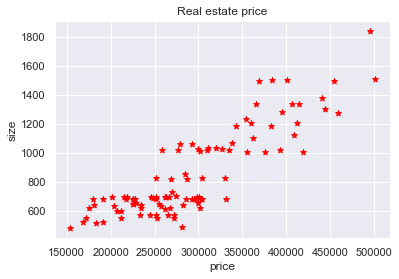

In [12]:
x=data['price']
y=data['size']
plt.scatter(x,y,color='red',marker='*')
plt.xlabel('price')
plt.ylabel('size')
plt.title('Real estate price')
plt.show()

In [13]:
x=data.drop(['size'],axis=1)
y=data[['size']]

In [15]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=20)

In [17]:
x_train

,price
37,233493.208
51,393069.760
35,302000.920
65,304587.272
31,225452.320
...,...
28,297760.440
95,252460.400
15,440201.616
90,251140.656


In [18]:
y_train

,size
37,570.25
51,1021.95
35,622.97
65,827.09
31,681.07
...,...
28,681.07
95,549.80
15,1379.72
90,694.52


In [20]:
from sklearn.linear_model import LinearRegression
regressor=LinearRegression()
regressor.fit(x_train,y_train)

LinearRegression()

In [22]:
regressor.score(x_train,y_train)

0.756771921792797

In [23]:
regressor.coef_

array([[0.00329]])

In [24]:
regressor.intercept_

array([-108.09865764])

In [26]:
# predict the test set results
y_pred=regressor.predict(x_test)
y_pred

array([[ 802.82168331],
       [ 643.05078864],
       [ 818.45149109],
       [ 856.01721735],
       [ 945.83753816],
       [ 740.15637626],
       [ 600.80418449],
       [ 777.65414432],
       [ 662.79446286],
       [ 755.27420768],
       [1149.07596849],
       [ 769.29204792],
       [ 589.06689206],
       [ 872.88301167],
       [ 698.11633136],
       [1095.59304652],
       [ 495.48273431],
       [ 993.8496405 ],
       [ 968.56021366],
       [ 855.75638629]])

In [29]:
from sklearn.metrics import mean_squared_error
errors=mean_squared_error(y_test,regressor.predict(x_test))
errors

19727.579070263473

In [30]:
errors=mean_squared_error(y_test,regressor.predict(x_test),squared=False)
errors

140.4549004850435

In [31]:
from sklearn.metrics import mean_absolute_error
errors=mean_absolute_error(y_test,y_pred)
errors

111.31751316647782

In [33]:
from sklearn.metrics import r2_score
errors=r2_score(y_test,y_pred)
errors

0.6467180266998624

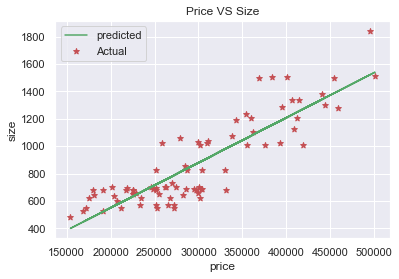

In [37]:
plt.scatter(x_train,y_train,color='r',marker='*',label='Actual')
plt.plot(x_train,regressor.predict(x_train),color='g',label='predicted')
plt.xlabel('price')
plt.ylabel('size')
plt.title('Price VS Size')
plt.legend(loc='best')
plt.show()

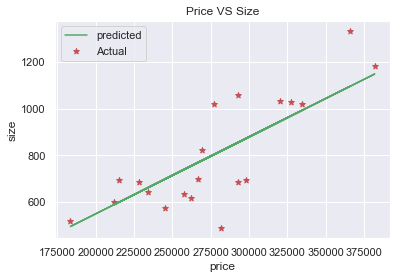

In [38]:
plt.scatter(x_test,y_test,color='r',marker='*',label='Actual')
plt.plot(x_test,regressor.predict(x_test),color='g',label='predicted')
plt.xlabel('price')
plt.ylabel('size')
plt.title('Price VS Size')
plt.legend(loc='best')
plt.show()

In [44]:
new_data=pd.DataFrame(data=[246457.786,456736.98,637369.098],columns=['price'])
new_data

,price
0,246457.786
1,456736.980
2,637369.098


In [43]:
regressor.predict(new_data)

array([[ 702.74702362],
       [1394.565201  ],
       [1988.84455064]])